# Домашнее задание "Функции потерь и оптимизация"

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

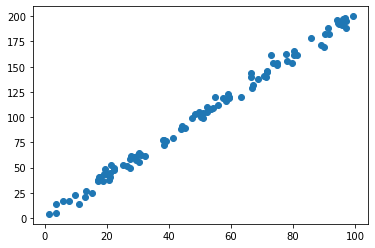

In [173]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

# Метод nesterov momentum

In [111]:
EPOCHS = 30
lr = 0.0001
momentum = 0.9

solution = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
change = [0.0 for _ in range(bounds.shape[0])]

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for iter in range(EPOCHS):
    # calculate the projected solution
    projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
    
    predictions = projected[0] + projected[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    # calculate the gradient for the projection
    gradient = [(np.sum(predictions - Y) / len(predictions)), (np.sum((predictions - Y) * X) / len(predictions))]
    # build a solution one variable at a time
    new_solution = []
    for i in range(solution.shape[0]):
        # calculate the change
        change[i] = (momentum * change[i]) - lr * gradient[i]
        # calculate the new position in this variable
        value = solution[i] + change[i]
        # store this variable
        new_solution.append(value)
    # evaluate candidate point
    solution = np.array(new_solution)
    solution_eval = np.sum(np.square((solution[0] + solution[1] * X) - Y)) / (2 * len(predictions))
    # report progress
    print('>%d f(%s) = %.5f' % (iter, solution, solution_eval))

>0 f([0.8991837  0.06278611]) = 5243.56146
>1 f([0.91552153 1.08376932]) = 1194.82162
>2 f([0.93023804 2.00456339]) = 11.64213
>3 f([0.93981878 2.60591515]) = 502.54104
>4 f([0.94338813 2.83313792]) = 947.92977
>5 f([0.9420319  2.75386779]) = 776.35508
>6 f([0.93781447 2.49677449]) = 339.28167
>7 f([0.93286834 2.19477995]) = 58.95804
>8 f([0.92878197 1.94688706]) = 17.03302
>9 f([0.92635112 1.80267061]) = 70.70797
>10 f([0.92563558 1.76581524]) = 93.63873
>11 f([0.92619928 1.80908758]) = 67.10122
>12 f([0.92740357 1.89262574]) = 30.49210
>13 f([0.92865423 1.97934231]) = 12.87026
>14 f([0.92955016 2.04419461]) = 13.26025
>15 f([0.92992687 2.07690047]) = 17.86109
>16 f([0.92981961 2.07963348]) = 18.37878
>17 f([0.92938409 2.06208313]) = 15.40990
>18 f([0.92881164 2.03616161]) = 12.58104
>19 f([0.92826405 2.01194129]) = 11.61469
>20 f([0.92783927 1.99551554]) = 11.88121
>21 f([0.92756671 1.9887032 ]) = 12.21042
>22 f([0.927423   1.99003584]) = 12.13607
>23 f([0.92735694 1.99630847]) = 11.

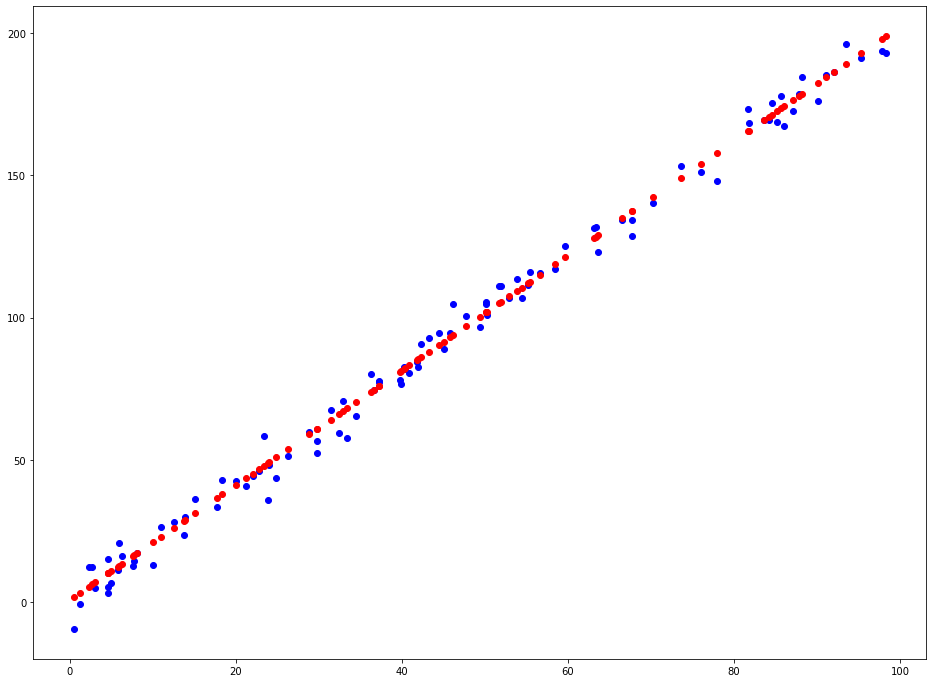

In [112]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[29], color='red')
plt.show()

# Метод rmsprop

In [174]:
EPOCHS = 30
lr = 0.25
eps=0.00001
gamma = 0.9

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

EG = np.zeros(2)

for it in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    grad = [(np.sum(predictions - Y) / len(predictions)), (np.sum((predictions - Y) * X) / len(predictions))]
    
    EG[0] = gamma*EG[0] + (1-gamma)*grad[0]**2
    EG[1] = gamma*EG[1] + (1-gamma)*grad[1]**2
    
    
    params[0] = params[0] - lr/np.sqrt(EG[0] + eps)*grad[0]
    params[1] = params[1] - lr/np.sqrt(EG[1] + eps)*grad[1]
    

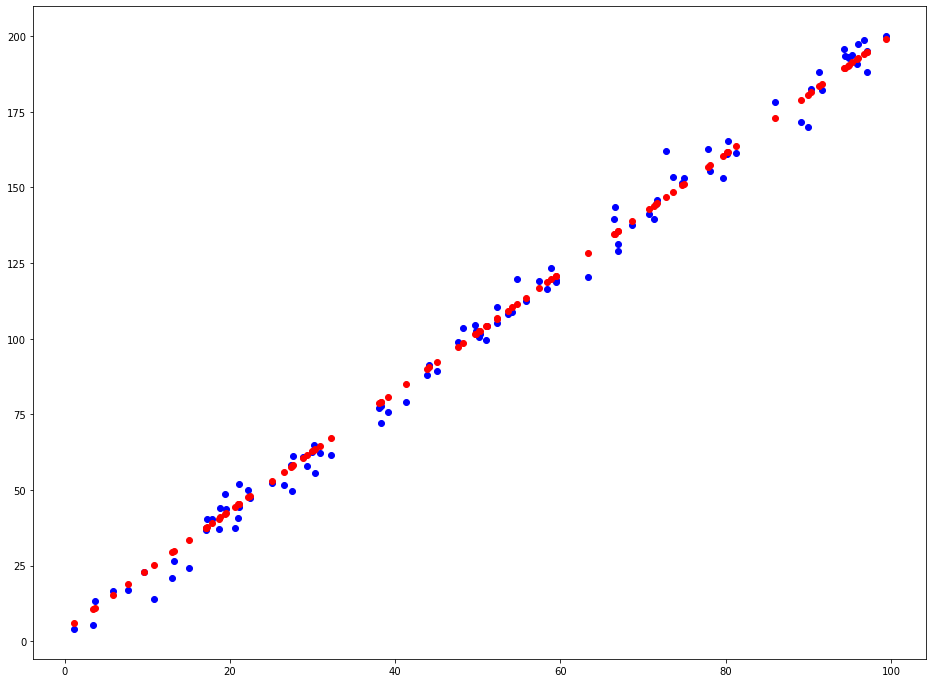

In [181]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[25], color='red')
plt.show()

In [191]:
v1 = np.array([[2], [2]])
np.dot(v1, v1.T)

array([[4, 4],
       [4, 4]])

In [188]:
v1.T

array([[1, 1]])